In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt to upload the files

Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


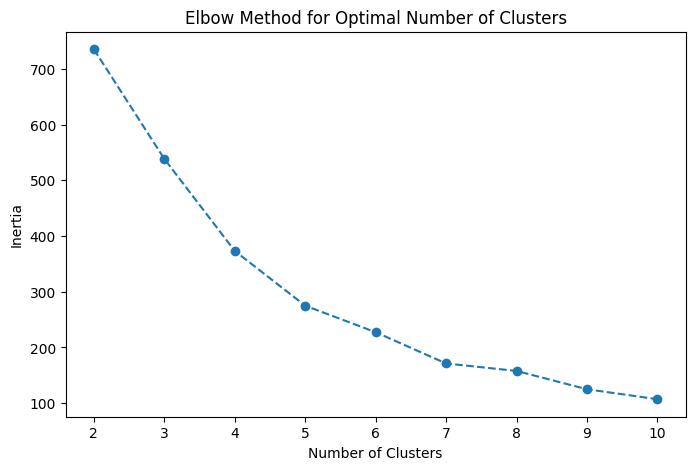

Davies-Bouldin Index: 0.9475622901515466
Silhouette Score: 0.431866885211329


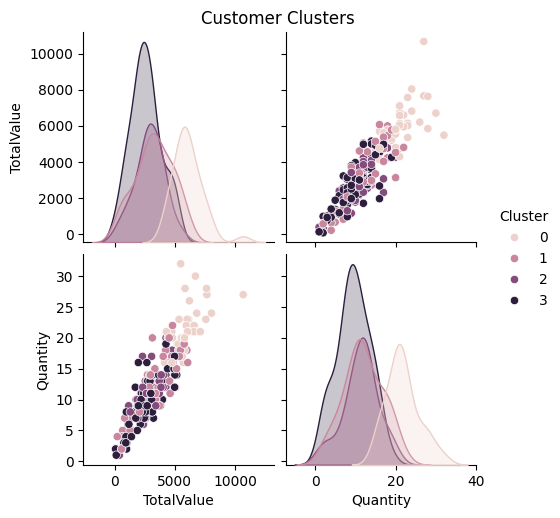

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets to form a complete customer profile
data = transactions.merge(customers, on="CustomerID")

# Aggregate transaction data for customer segmentation
customer_features = data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending
    "Quantity": "sum",    # Total quantity purchased
}).reset_index()

# Add profile information
customer_features = customer_features.merge(customers, on="CustomerID")

# One-Hot Encoding for categorical features (if any)
customer_features_encoded = pd.get_dummies(customer_features, columns=["Region"], drop_first=True)

# Feature selection
X = customer_features_encoded.drop(columns=["CustomerID", "CustomerName", "SignupDate"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (e.g., 4 based on the elbow method)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
customer_features["Cluster"] = clusters

# Calculate Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(X_scaled, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using a pair plot
sns.pairplot(customer_features, hue="Cluster", diag_kind="kde")
plt.suptitle("Customer Clusters", y=1.02)
plt.show()

# Save clustering results to a CSV file
customer_features.to_csv("Customer_Segments.csv", index=False)

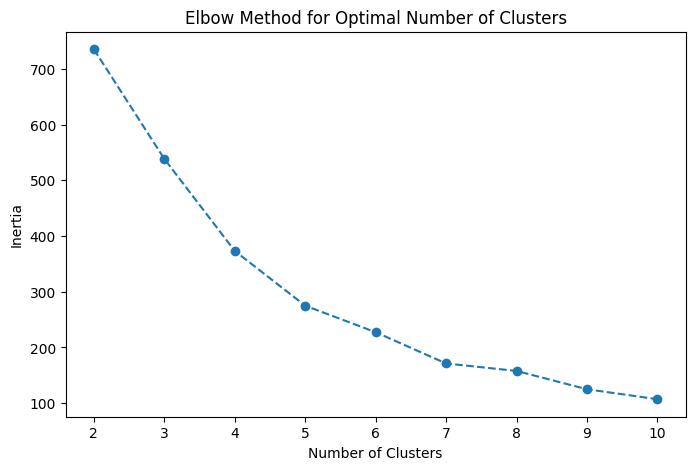

Davies-Bouldin Index: 0.9475622901515466
Silhouette Score: 0.431866885211329


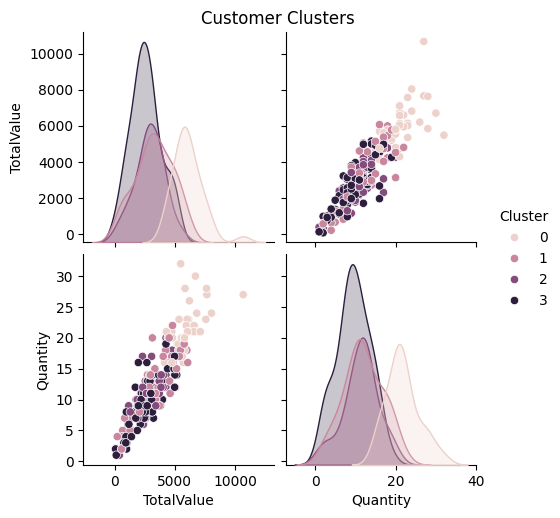

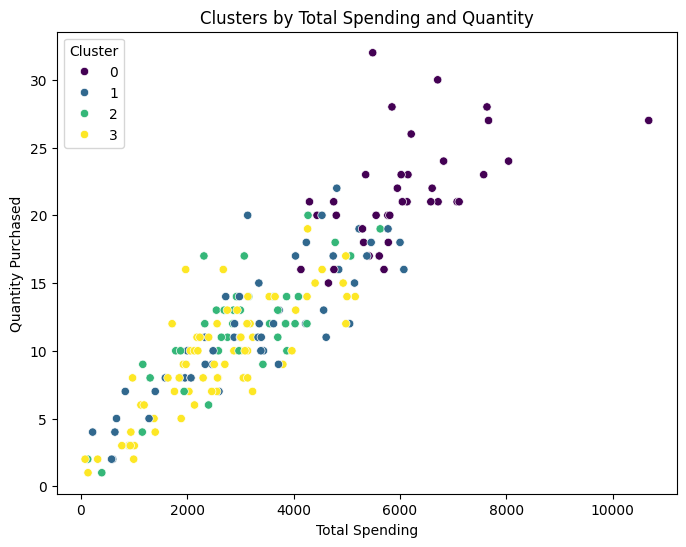

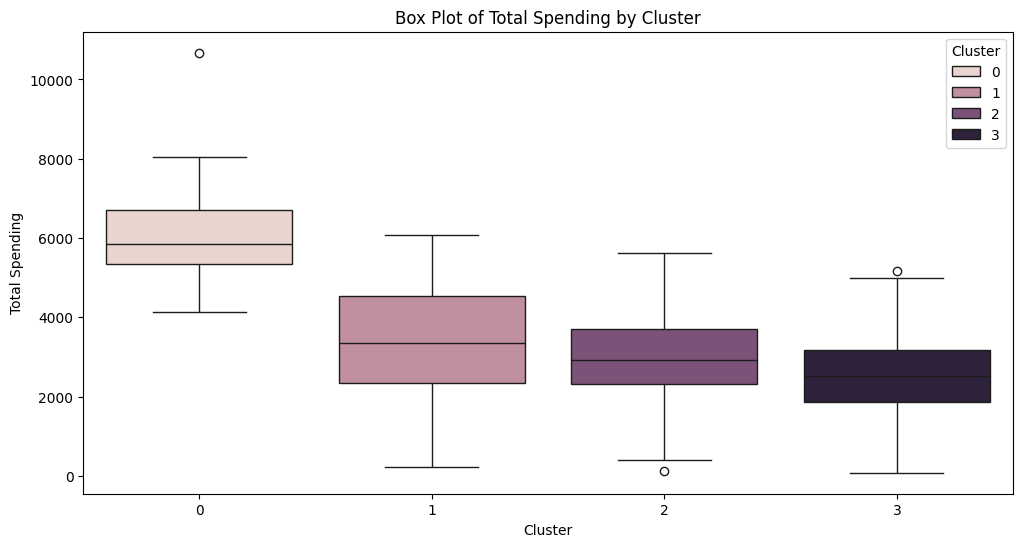

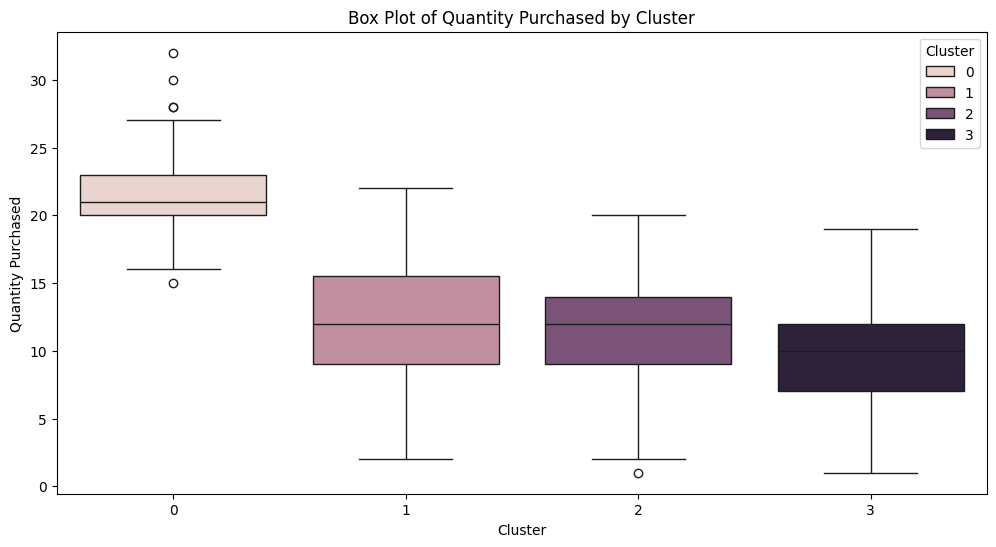

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets to form a complete customer profile
data = transactions.merge(customers, on="CustomerID")

# Aggregate transaction data for customer segmentation
customer_features = data.groupby("CustomerID").agg({
    "TotalValue": "sum",  # Total spending
    "Quantity": "sum",    # Total quantity purchased
}).reset_index()

# Add profile information
customer_features = customer_features.merge(customers, on="CustomerID")

# One-Hot Encoding for categorical features (if any)
customer_features_encoded = pd.get_dummies(customer_features, columns=["Region"], drop_first=True)

# Feature selection
X = customer_features_encoded.drop(columns=["CustomerID", "CustomerName", "SignupDate"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (e.g., 4 based on the elbow method)
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
customer_features["Cluster"] = clusters

# Calculate Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(X_scaled, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Enhanced Visualizations
# Pair Plot
sns.pairplot(customer_features, hue="Cluster", diag_kind="kde")
plt.suptitle("Customer Clusters", y=1.02)
plt.show()

# Scatter Plot: TotalValue vs Quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_features, x="TotalValue", y="Quantity", hue="Cluster", palette="viridis")
plt.title("Clusters by Total Spending and Quantity")
plt.xlabel("Total Spending")
plt.ylabel("Quantity Purchased")
plt.legend(title="Cluster")
plt.show()

# Corrected Box Plots for Clusters
# Box Plot for TotalValue by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_features, x="Cluster", y="TotalValue", hue="Cluster", dodge=False)
plt.title("Box Plot of Total Spending by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Total Spending")
plt.legend(title="Cluster", loc="upper right")
plt.show()

# Box Plot for Quantity by Cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_features, x="Cluster", y="Quantity", hue="Cluster", dodge=False)
plt.title("Box Plot of Quantity Purchased by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Quantity Purchased")
plt.legend(title="Cluster", loc="upper right")
plt.show()

# Save clustering results to a CSV file
customer_features.to_csv("Customer_Segments_Enhanced.csv", index=False)
